# Bibliotecas


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import numpy as np
from unidecode import unidecode
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D
import re
from textblob import TextBlob
import langid
import nltk
from nltk.corpus import stopwords
import random 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Visual

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Carga de datos 

In [3]:
df = pd.read_csv("data_fifa_v2.csv")

In [4]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.shape

(18207, 88)

In [6]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

In [7]:
column_names = df.columns.tolist()
column_names_str = ', '.join(column_names)
print(column_names_str)

ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Real Face, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause


# Limpieza

In [8]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [9]:
columns_to_drop = ["Loaned From", "Photo", "Club Logo", "Flag", "Joined", "Release Clause"]
df = df.drop(columns_to_drop, axis=1)

In [10]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [11]:
df = df.dropna(subset=['Club']) #borrar celdas vacias de esa variable

In [12]:
columns_to_fill = ["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM",
                   "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM",
                   "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB"]

for index, row in df.iterrows():
    position = str(row["Position"])
    if position.startswith("GK"):
        for column in columns_to_fill:
            if pd.isnull(row[column]):
                df.loc[index, column] = random.randint(10, 20)

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW                          0
LAM                         0
CAM                         0
RAM                         0
LM        

In [15]:
df.shape

(17918, 82)

In [16]:
df = df.replace("€", "", regex=True)

In [17]:
df.rename(columns={'Value': 'ValueM', 'Wage': 'WageK', 'Weight': 'WeightKG'}, inplace=True)

In [18]:
df['ValueM'] = df['ValueM'].str.replace('M', '').str.replace('K', '')
df['WageK'] = df['WageK'].str.replace('K', '')
df['WeightKG'] = df['WeightKG'].str.replace('lbs', '')

In [19]:
def convertir_a_cm(height):
    feet, inches = map(int, height.split("'"))
    total_inches = feet * 12 + inches
    return total_inches * 2.54

df['Height'] = df['Height'].apply(convertir_a_cm)

In [20]:
df['WeightKG'] = pd.to_numeric(df['WeightKG'], errors='coerce')
def libras_a_kilos(peso_libras):
    return peso_libras * 0.45359237


df['WeightKG'] = df['WeightKG'].apply(libras_a_kilos)

In [21]:
df['ValueM'] = df['ValueM'].astype(float)
df['WageK'] = df['WageK'].astype(float)

In [22]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,ValueM,WageK,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Contract Valid Until,Height,WeightKG,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2021,170.18,72.121187,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2022,187.96,83.007404,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2022,175.26,68.038855,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2020,193.04,76.203518,20.0,17.0,15.0,14.0,11.0,19.0,11.0,12.0,13.0,14.0,12.0,15.0,14.0,15.0,19.0,13.0,16.0,16.0,12.0,15.0,12.0,20.0,13.0,19.0,20.0,13.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2023,180.34,69.853225,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [23]:
df.describe()

,ID,Age,Overall,Potential,ValueM,WageK,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,WeightKG,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.00000
mean,214225.713472,25.105257,66.236801,71.329334,268.352232,9.883748,1598.111731,1.113908,2.947260,2.362875,19.643041,181.257025,75.282208,53.054638,53.067028,53.059605,54.152528,53.863322,53.868847,53.884418,54.155374,54.094765,54.109052,54.103025,54.762529,53.417625,53.424545,53.418574,54.779105,52.767831,52.154593,52.179819,52.165532,52.790323,52.141255,51.088738,51.086840,51.095658,52.146333,49.748856,45.581147,52.295290,58.713417,42.932135,55.411207,47.215816,42.882018,52.724300,58.411151,64.601518,64.720672,63.523384,61.820516,63.962384,55.490512,65.116475,63.205994,65.323697,47.130316,55.879060,46.690870,49.995758,53.448934,48.544480,58.655263,47.264092,47.684005,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367
std,30042.543245,4.675372,6.929243,6.144098,290.149881,22.142769,272.983157,0.395495,0.660106,0.756309,16.008322,6.730340,7.077894,16.017957,15.986869,16.005131,16.701898,16.616379,16.603152,16.565911,16.695363,16.656930,16.623291,16.637177,16.580202,15.949822,15.933114,15.947346,16.541632,15.852114,16.268231,16.211625,16.243468,15.799144,15.942716,16.883916,16.888484,16.870151,15.929314,18.354989,19.512533,17.367823,14.680340,17.688194,18.904436,18.389442,17.483142,15.311376,16.665568,14.947197,14.666098,14.768421,9.024412,14.149768,17.215926,11.836960,15.892897,12.552242,19.251517,17.354347,20.691841,19.521104,14.119193,15.691563,11.420965,19.874746,21.647674,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613
min,16.000000,16.000000,46.000000,48.000000,0.000000,1.000000,731.000000,1.000000,1.000000,1.000000,1.000000,154.940000,49.895161,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,200235.250000,21.000000,62.000000,67.000000,4.900000,1.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,175.260000,69.853225,48.000000,48.000000,48.000000,49.000000,48.000000,48.000000,48.000000,49.000000,49.000000,49.000000,49.000000,50.000000,49.000000,49.000000,49.000000,50.000000,48.000

In [24]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
ValueM                      float64
WageK                       float64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Contract Valid Until         object
Height                      float64
WeightKG                    float64
LS                          float64
ST                          float64
RS                          float64
LW                          float64
LF                          float64
CF                          

# Ingenieria de variables 

In [25]:
condiciones = [
    (df['Overall'].between(46, 65)),   
    (df['Overall'].between(66, 77)),   
    (df['Overall'].between(78, 86)),   
    (df['Overall'].between(87, 94)),   
]

nombres = ['malo', 'regular', 'bueno', 'premium']
df['ClasJuga'] = np.select(condiciones, nombres)

In [26]:
condiciones_etapa_vida = [
    (df['Age'].between(16, 20)),   
    (df['Age'].between(21, 28)),  
    (df['Age'].between(29, 33)),   
    (df['Age'].between(34, 45)),   
]
nombres_etapa_vida = ['promesa', 'joven', 'adulto', 'veterano']

df['EtapaVid'] = np.select(condiciones_etapa_vida, nombres_etapa_vida, default='Otro')

In [27]:
columnas_habilidades_defensivas = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
df['PromedioHabilidadesDefensivas'] = df[columnas_habilidades_defensivas].mean(axis=1)
df['PromedioHabilidadesDefensivas'] = df[columnas_habilidades_defensivas].mean(axis=1)
rango = [0, 60, 70, 80, 100]
etiquetas = ['Malo', 'Regular', 'Bueno', 'Muy Bueno']
df['NivelGralDef'] = pd.cut(df['PromedioHabilidadesDefensivas'], bins=rango, labels=etiquetas)

In [28]:
columnas_habilidades_ofensivas = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
df['PromedioHabilidadesOfensivas'] = df[columnas_habilidades_ofensivas].mean(axis=1)
rango = [0, 60, 70, 80, 100]
etiquetas = ['Malo', 'Regular', 'Bueno', 'Muy Bueno']
df['NivelGralAtaque'] = pd.cut(df['PromedioHabilidadesOfensivas'], bins=rango, labels=etiquetas)


In [29]:
columnas_control_medio_campo = ['ShortPassing', 'LongPassing', 'BallControl', 'Vision', 'Composure', 'Interceptions', 'Dribbling']
df['PromedioControlMedioCampo'] = df[columnas_control_medio_campo].mean(axis=1)
rango_control_medio_campo = [0, 60, 70, 100]
etiquetas_control_medio_campo = ['Bajo', 'Medio', 'Alto']
df['ControlDeMedioCampo'] = pd.cut(df['PromedioControlMedioCampo'], bins=rango_control_medio_campo, labels=etiquetas_control_medio_campo)

In [30]:
regiones_geograficas = {
    'England': 'Europa',
    'Germany': 'Europa',
    'Spain': 'Europa',
    'Argentina': 'Sudamérica',
    'France': 'Europa',
    'Brazil': 'Sudamérica',
    'Italy': 'Europa',
    'Colombia': 'Sudamérica',
    'Japan': 'Asia',
    'Netherlands': 'Europa',
    'Sweden': 'Europa',
    'China PR': 'Asia',
    'Chile': 'Sudamérica',
    'Republic of Ireland': 'Europa',
    'Mexico': 'Norteamérica',
    'United States': 'Norteamérica',
    'Poland': 'Europa',
    'Norway': 'Europa',
    'Saudi Arabia': 'Asia',
    'Denmark': 'Europa',
    'Korea Republic': 'Asia',
    'Portugal': 'Europa',
    'Turkey': 'Asia',
    'Austria': 'Europa',
    'Scotland': 'Europa',
    'Belgium': 'Europa',
    'Australia': 'Oceanía',
    'Switzerland': 'Europa',
    'Uruguay': 'Sudamérica',
    'Senegal': 'África',
    'Wales': 'Europa',
    'Serbia': 'Europa',
    'Croatia': 'Europa',
    'Nigeria': 'África',
    'Ghana': 'África',
    'Greece': 'Europa',
    'Czech Republic': 'Europa',
    'Ivory Coast': 'África',
    'Cameroon': 'África',
    'Morocco': 'África',
    'Northern Ireland': 'Europa',
    'Ukraine': 'Europa',
    'Russia': 'Europa',
    'Finland': 'Europa',
    'Paraguay': 'Sudamérica',
    'Bosnia Herzegovina': 'Europa',
    'Algeria': 'África',
    'Canada': 'Norteamérica',
    'Venezuela': 'Sudamérica',
    'South Africa': 'África',
    'Slovakia': 'Europa',
}
def asignar_region(nacionalidad):
    return regiones_geograficas.get(nacionalidad, 'Otro')
df['Region'] = df['Nationality'].apply(asignar_region)

In [31]:
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,ValueM,WageK,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Contract Valid Until,Height,WeightKG,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ClasJuga,EtapaVid,PromedioHabilidadesDefensivas,NivelGralDef,PromedioHabilidadesOfensivas,NivelGralAtaque,PromedioControlMedioCampo,ControlDeMedioCampo,Region
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2021,170.18,72.121187,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,premium,adulto,57.0,Malo,77.379310,Bueno,83.142857,Alto,Sudamérica
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2022,187.96,83.007404,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,premium,adulto,59.4,Malo,78.103448,Bueno,78.000000,Alto,Europa
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2022,175.26,68.038855,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,premium,joven,57.1,Malo,75.103448,Bueno,81.428571,Alto,Sudamérica
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2020,193.04,76.203518,20.0,17.0,15.0,14.0,11.0,19.0,11.0,12.0,13.0,14.0,12.0,15.0,14.0,15.0,19.0,13.0,16.0,16.0,12.0,15.0,12.0,20.0,13.0,19.0,20.0,13.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,premium,joven,15.6,Malo,37.758621,Malo,46.714286,Bajo,Europa
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2023,180.34,69.853225,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,premium,joven,72.9,Bueno,79.758621,Bueno,86.142857,Alto,Europa
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,340.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,2020,172.72,73.935556,83.0,83.0,83.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,82.0,82.0,82.0,89.0,66.0,63.0,63.0,63.0,66.0,60.0,49.0,49.0,49.0,60.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,premium,joven,58.8,Malo,75.448276,Bueno,83.142857,Alto,Europa
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67.0,420.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,2020,172.72,66.224486,77.0,77.0,77.0,85.0,84.0,84.0,8

# Normalizacion/codificacion

In [32]:
df['Region'].value_counts()

Europa          10129
Sudamérica       3034
Asia             1841
Otro             1159
Norteamérica      777
África            744
Oceanía           234
Name: Region, dtype: int64

In [33]:
df['EtapaVid'] = df['EtapaVid'].astype('category')
df['Region'] = df['Region'].astype('category')

In [34]:
df.dtypes

ID                                  int64
Name                               object
Age                                 int64
Nationality                        object
Overall                             int64
Potential                           int64
Club                               object
ValueM                            float64
WageK                             float64
Special                             int64
Preferred Foot                     object
International Reputation          float64
Weak Foot                         float64
Skill Moves                       float64
Work Rate                          object
Body Type                          object
Real Face                          object
Position                           object
Jersey Number                     float64
Contract Valid Until               object
Height                            float64
WeightKG                          float64
LS                                float64
ST                                

In [35]:
df['EtapaVid'].value_counts()

joven       10236
adulto       3498
promesa      3304
veterano      880
Name: EtapaVid, dtype: int64

In [36]:
df['NivelGralDef'].value_counts()

Malo         11357
Regular       5344
Bueno         1184
Muy Bueno       33
Name: NivelGralDef, dtype: int64

In [37]:
df['NivelGralAtaque'].value_counts()

Malo         11823
Regular       5456
Bueno          638
Muy Bueno        1
Name: NivelGralAtaque, dtype: int64

In [38]:
df['ControlDeMedioCampo'].value_counts()

Bajo     10967
Medio     5439
Alto      1512
Name: ControlDeMedioCampo, dtype: int64

In [39]:
df['Region'].value_counts()

Europa          10129
Sudamérica       3034
Asia             1841
Otro             1159
Norteamérica      777
África            744
Oceanía           234
Name: Region, dtype: int64

In [40]:
etapa_vid_mapping = {
    'joven': 0,
    'adulto': 1,
    'promesa': 2,
    'veterano': 3
}
df['EtapaVid_Codificado'] = df['EtapaVid'].map(etapa_vid_mapping)

In [41]:
label_encoder = LabelEncoder()
df['NivelGralDef_Codificado'] = label_encoder.fit_transform(df['NivelGralDef'])

In [42]:
label_encoder = LabelEncoder()
df['NivelGralAtaque_Codificado'] = label_encoder.fit_transform(df['NivelGralAtaque'])

In [43]:
label_encoder = LabelEncoder()
df['ControlDeMedioCampo_Codificado'] = label_encoder.fit_transform(df['ControlDeMedioCampo'])

In [44]:
label_encoder = LabelEncoder()
df['Region_Codificado'] = label_encoder.fit_transform(df['Region'])

In [45]:
df.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
ValueM                             float64
WageK                              float64
Special                              int64
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Real Face                           object
Position                            object
Jersey Number                      float64
Contract Valid Until                object
Height                             float64
WeightKG                           float64
LS                                 float64
ST         

In [46]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,ValueM,WageK,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Contract Valid Until,Height,WeightKG,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ClasJuga,EtapaVid,PromedioHabilidadesDefensivas,NivelGralDef,PromedioHabilidadesOfensivas,NivelGralAtaque,PromedioControlMedioCampo,ControlDeMedioCampo,Region,EtapaVid_Codificado,NivelGralDef_Codificado,NivelGralAtaque_Codificado,ControlDeMedioCampo_Codificado,Region_Codificado
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2021,170.18,72.121187,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,premium,adulto,57.0,Malo,77.379310,Bueno,83.142857,Alto,Sudamérica,1,1,0,0,5
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2022,187.96,83.007404,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,premium,adulto,59.4,Malo,78.103448,Bueno,78.000000,Alto,Europa,1,1,0,0,1


In [47]:
variables_a_normalizar = ['Age', 'Overall', 'Potential', 'ValueM', 'WageK', 'Special', 'International Reputation',
                          'Weak Foot', 'Skill Moves', 'Height', 'WeightKG', 'Jersey Number', 'LS', 'ST', 'RS', 'LW',
                          'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                          'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
                          'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                          'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                          'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
                          'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                          'GKKicking', 'GKPositioning', 'GKReflexes']
scaler = MinMaxScaler()
df[variables_a_normalizar] = scaler.fit_transform(df[variables_a_normalizar])

In [48]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,ValueM,WageK,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Contract Valid Until,Height,WeightKG,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ClasJuga,EtapaVid,PromedioHabilidadesDefensivas,NivelGralDef,PromedioHabilidadesOfensivas,NivelGralAtaque,PromedioControlMedioCampo,ControlDeMedioCampo,Region,EtapaVid_Codificado,NivelGralDef_Codificado,NivelGralAtaque_Codificado,ControlDeMedioCampo_Codificado,Region_Codificado
0,158023,L. Messi,0.517241,Argentina,1.0,0.978723,FC Barcelona,0.113333,1.000000,0.910836,Left,1.0,0.75,0.75,Medium/ Medium,Messi,Yes,RF,0.091837,2021,0.30,0.368421,0.962963,0.962963,0.962963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.948718,0.948718,0.948718,1.000000,0.720000,0.662338,0.662338,0.662338,0.720000,0.662162,0.480519,0.480519,0.480519,0.662162,0.897727,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,1.000000,0.928571,1.000000,0.929412,0.880952,0.939024,0.986667,0.9875,0.892473,0.6625,0.714286,0.525,1.000000,0.440476,0.213483,0.989247,1.000000,0.804598,1.000000,0.329670,0.285714,0.261364,0.056180,0.10989,0.155556,0.146067,0.075269,premium,adulto,57.0,Malo,77.379310,Bueno,83.142857,Alto,Sudamérica,1,1,0,0,5
1,20801,Cristiano Ronaldo,0.586207,Portugal,1.0,0.978723,Juventus,0.078974,0.716312,0.926935,Right,1.0,0.75,1.00,High/ Low,C. Ronaldo,Yes,ST,0.061224,2022,0.65,0.548872,1.000000,1.000000,1.000000,0.963415,0.963855,0.963855,0.963855,0.963415,0.939759,0.939759,0.939759,0.962963,0.910256,0.910256,0.910256,0.962963,0.733333,0.662338,0.662338,0.662338,0.733333,0.689189,0.558442,0.558442,0.558442,0.689189,0.897727,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,0.802198,0.809524,0.978022,0.905882,0.940476,0.890244,1.000000,0.6750,1.000000,1.0000,0.904762,0.775,0.989011,0.619048,0.292135,1.000000,0.857143,0.919540,0.989247,0.274725,0.318681,0.227273,0.067416,0.10989,0.155556,0.146067,0.107527,premium,adulto,59.4,Malo,78.103448,Bueno,78.000000,Alto,Europa,1,1,0,0,1


In [49]:
df.isnull().sum()

ID                                0
Name                              0
Age                               0
Nationality                       0
Overall                           0
Potential                         0
Club                              0
ValueM                            0
WageK                             0
Special                           0
Preferred Foot                    0
International Reputation          0
Weak Foot                         0
Skill Moves                       0
Work Rate                         0
Body Type                         0
Real Face                         0
Position                          0
Jersey Number                     0
Contract Valid Until              0
Height                            0
WeightKG                          0
LS                                0
ST                                0
RS                                0
LW                                0
LF                                0
CF                          

# Reduccion de dimencinalidad 

In [50]:
n_componentes = 10 
pca = PCA(n_components=n_componentes)

variables_relevantes = ['Age', 'Overall', 'Potential', 'ValueM', 'WageK', 'Special', 'International Reputation',
                        'Weak Foot', 'Skill Moves', 'Height', 'WeightKG', 'Jersey Number', 'LS', 'ST', 'RS', 'LW',
                        'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                        'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
                        'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                        'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                        'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
                        'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                        'GKKicking', 'GKPositioning', 'GKReflexes']


pca_resultados = pca.fit_transform(df[variables_relevantes])

df_pca = pd.DataFrame(data=pca_resultados, columns=[f'Componente_{i+1}' for i in range(n_componentes)])

df_final = pd.concat([df_pca, df[['NivelGralDef_Codificado', 'NivelGralAtaque_Codificado', 'ControlDeMedioCampo_Codificado', 'Region_Codificado']]], axis=1)


In [51]:
df_final.shape

(18207, 14)

In [52]:
df_final.isnull().sum()

Componente_1                      289
Componente_2                      289
Componente_3                      289
Componente_4                      289
Componente_5                      289
Componente_6                      289
Componente_7                      289
Componente_8                      289
Componente_9                      289
Componente_10                     289
NivelGralDef_Codificado           289
NivelGralAtaque_Codificado        289
ControlDeMedioCampo_Codificado    289
Region_Codificado                 289
dtype: int64

In [53]:
df_final = df_final.dropna()

In [54]:
df_final.isnull().sum()

Componente_1                      0
Componente_2                      0
Componente_3                      0
Componente_4                      0
Componente_5                      0
Componente_6                      0
Componente_7                      0
Componente_8                      0
Componente_9                      0
Componente_10                     0
NivelGralDef_Codificado           0
NivelGralAtaque_Codificado        0
ControlDeMedioCampo_Codificado    0
Region_Codificado                 0
dtype: int64

/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

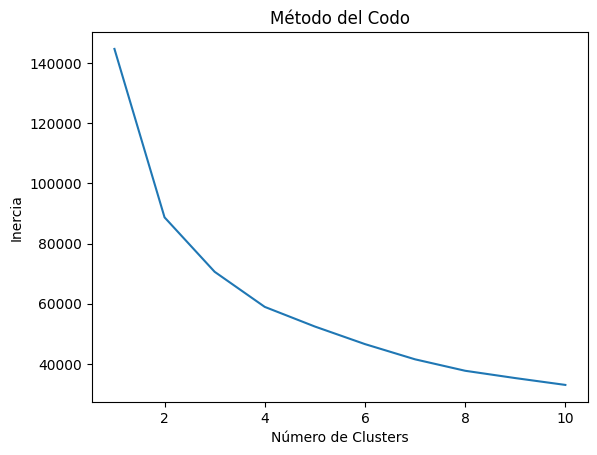

In [55]:
inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_final)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Clustering

In [56]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_final)
cluster_labels = kmeans.labels_
df_final['Cluster'] = cluster_labels

/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
df_final.head()

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,NivelGralDef_Codificado,NivelGralAtaque_Codificado,ControlDeMedioCampo_Codificado,Region_Codificado,Cluster
0,-2.219514,-1.571110,0.882602,0.142889,-0.436052,-0.155822,0.295511,-0.065357,0.088959,-0.349866,1.0,0.0,0.0,5.0,0
1,-2.185547,-1.303852,1.027887,0.514604,-0.051027,-0.565799,0.295752,-0.026475,0.091408,-0.207927,1.0,0.0,0.0,1.0,3
2,-2.064795,-1.457119,0.756711,0.020676,-0.440470,-0.207730,0.396981,-0.181123,0.320692,-0.204426,1.0,0.0,0.0,5.0,0
3,2.992041,-0.203282,1.352562,0.052874,-0.790075,-0.539456,0.408229,-0.070350,0.066253,-0.260348,1.0,1.0,1.0,1.0,2
4,-2.491285,-0.546138,0.936718,0.168365,-0.450639,0.017228,0.362944,-0.159883,0.313810,-0.085384,0.0,0.0,0.0,1.0,3


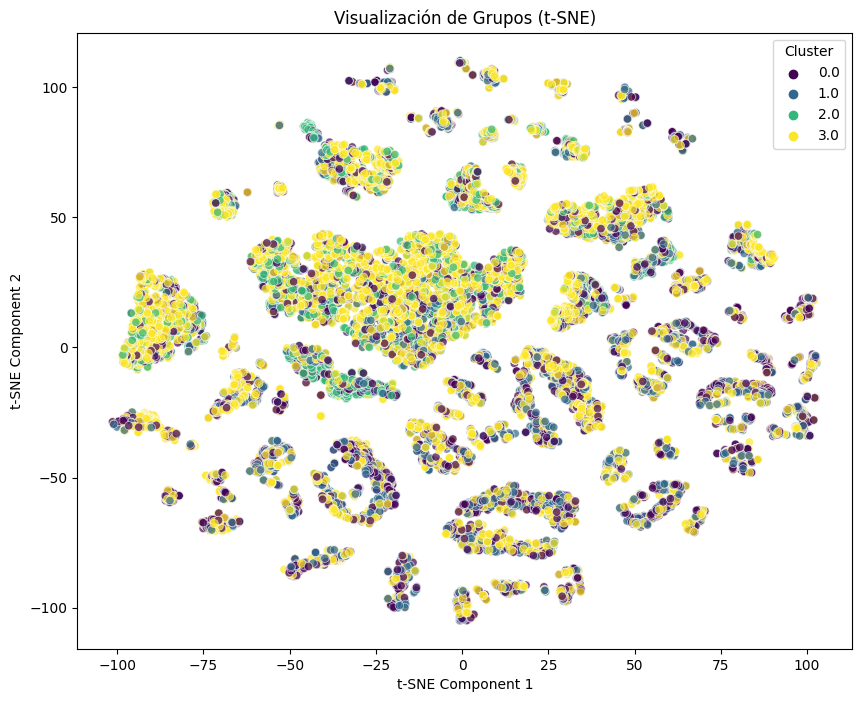

In [58]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_final)
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE_1', 'TSNE_2'])
df_tsne['Cluster'] = df_final['Cluster']
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='TSNE_1', y='TSNE_2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Visualización de Grupos (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


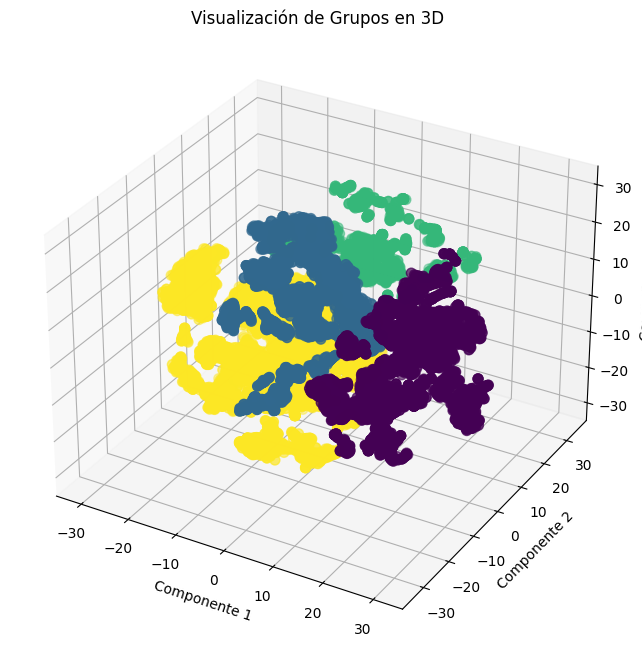

In [59]:
from mpl_toolkits.mplot3d import Axes3D
tsne = TSNE(n_components=3, random_state=42)
data_3d = tsne.fit_transform(df_final)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
cluster_labels = kmeans.labels_
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Visualización de Grupos en 3D')
plt.show()

In [60]:
df_final.describe()

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,NivelGralDef_Codificado,NivelGralAtaque_Codificado,ControlDeMedioCampo_Codificado,Region_Codificado,Cluster
count,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000,17629.000000
mean,-0.000236,-0.000314,0.000325,-0.000217,-0.000126,-0.000011,-0.000084,0.000207,0.000125,0.000004,1.540984,1.582846,1.222758,2.060242,1.731579
std,1.308623,0.610278,0.343395,0.280668,0.266854,0.202210,0.175474,0.154056,0.152271,0.134656,0.994472,0.966721,0.587105,1.858264,1.260937
min,-2.617983,-1.571110,-0.787939,-0.860499,-0.901136,-0.799829,-0.672868,-0.431989,-0.660187,-0.508947,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.787712,-0.539007,-0.295793,-0.200973,-0.182038,-0.139717,-0.118859,-0.096660,-0.083044,-0.092587,1.000000,1.000000,1.000000,1.000000,0.000000
50%,-0.311844,-0.015458,-0.020408,-0.020527,-0.010804,-0.005114,-0.002853,-0.015566,-0.001445,-0.001382,1.000000,1.000000,1.000000,1.000000,2.000000
75%,0.270971,0.476464,0.260160,0.178836,0.177888,0.132030,0.115650,0.072244,0.092134,0.089910,3.000000,3.000000,2.000000,4.000000,3.000000
max,3.560933,1.621391,1.470682,1.334952,0.926600,0.929572,0.790272,0.911002,0.662983,0.639386,3.000000,3.000000,2.000000,6.000000,3.000000
